In [64]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [65]:
def visualize_graph(G):

    # SET LAYOUT
    pos = nx.spring_layout(G, k=1, iterations=20)

    # GET NODE INFO
    in_degrees = dict(G.in_degree())

    # SET NODE SIZING
    node_sizes = [in_degrees[node]*30 for node in G.nodes()]

    # DRAW NETWORK
    nx.draw(G,
        node_size=node_sizes,
        pos=pos
    )


def in_degree_summary(G):

    # PRINT NUMBER OF NODES
    print(f"Number of nodes (surfers): {len(G.nodes())}\n")

    # GET IN-DEGREE STATS
    print("IN-DEGREE SUMMARY:")
    node_in_degrees = dict(G.in_degree(weight="weight"))
    in_degree_list = list(node_in_degrees.values())
    surfer_list = list(node_in_degrees.keys())

    # SHOW HISTOGRAM
    sns.histplot(in_degree_list, bins=20, color="darkblue")
    plt.title("Distribution of In-degree", fontsize=18)
    plt.xlabel("In-degree", fontsize=14)
    plt.ylabel("Surfer count", fontsize=14)
    plt.show(); plt.clf()

    # MAKE DATAFRAME
    in_degree_df = pd.DataFrame({"surfer": surfer_list, "in-degree": in_degree_list})
    in_degree_df = in_degree_df.sort_values(by="in-degree", ascending=False)
    in_degree_df.reset_index(inplace=True, drop=True)
    print(in_degree_df.head(20))
    print("\n")
    
    # ISOLATE TOP SURFERS BY IN-DEGREE
    nodes_over = in_degree_df[in_degree_df["in-degree"] > 400]
    perc_over = len(nodes_over) / len(in_degree_df)
    print(f"Number of surfers with in-degree > 400: {len(nodes_over)}")
    print(f"Surfers with in-degree >400: {round(perc_over, 4)*100}%")
    


## Analysis of in-degree

Number of nodes (surfers): 131

IN-DEGREE SUMMARY:


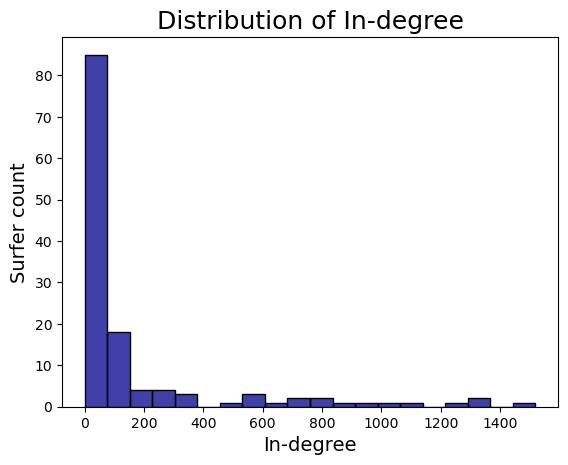

                surfer  in-degree
0       Gabriel Medina       1519
1         Mick Fanning       1319
2         Kelly Slater       1306
3          Jordy Smith       1267
4        Julian Wilson       1080
5       Joel Parkinson       1053
6     Adriano de Souza        941
7   John John Florence        851
8           Taj Burrow        815
9        Michel Bourez        788
10         Owen Wright        726
11       Filipe Toledo        718
12           Josh Kerr        629
13       Jeremy Flores        605
14       Adrian Buchan        575
15      Italo Ferreira        570
16       Kolohe Andino        512
17     Sebastian Zietz        359
18      Kanoa Igarashi        329
19       Bede Durbidge        321


Number of surfers with in-degree > 400: 17
Surfers with in-degree >400: 12.98%


<Figure size 640x480 with 0 Axes>

In [66]:
net = nx.read_gml(f"../data/networks/overall_results_network.gml")
in_degree_summary(net)

In [67]:
network_files = os.listdir("../data/networks")

for file in network_files:

    event_name = file.split("_network")[0]
    print("---------------------------------------------")
    print(f"EVENT: {event_name.upper()}")

    net = nx.read_gml(f"../data/networks/{file}")

    #quick_summary(net)

---------------------------------------------
EVENT: MARGARET-RIVER_RESULTS
---------------------------------------------
EVENT: QUIKSILVER-PRO-GOLD-COAST_RESULTS
---------------------------------------------
EVENT: TEAHUPOO_RESULTS
---------------------------------------------
EVENT: BILLABONG-PIPE-MASTERS_RESULTS
---------------------------------------------
EVENT: FIJI_RESULTS
---------------------------------------------
EVENT: J-BAY_RESULTS
---------------------------------------------
EVENT: RIO_RESULTS
---------------------------------------------
EVENT: PORTUGAL_RESULTS
---------------------------------------------
EVENT: BALI_RESULTS
---------------------------------------------
EVENT: QUIKSILVER-PRO-FRANCE_RESULTS
---------------------------------------------
EVENT: OVERALL_RESULTS
---------------------------------------------
EVENT: TRESTLES_RESULTS
---------------------------------------------
EVENT: RIP-CURL-PRO-BELLS-BEACH_RESULTS
